In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
nlist = dict()
sum=0
fields = pd.read_csv("fields.csv")
for index, row in fields.iterrows():
    place = row['Neighborhood']
    backstop = row ['Back Stop']
    if place in nlist and backstop == 1:
        nlist[place] = nlist[place]+1
        sum+=1
    if place not in nlist and backstop == 1:
        nlist[place] = 1
        sum+=1
print(sum)
print(nlist)

118
{'Bedford Dwellings': 2, 'Southside Slopes': 5, 'Southside Flates': 1, 'Lower Lawrenceville': 3, 'Bankville': 2, 'Squirrel Hill South': 6, 'Brighton Heights': 7, 'Broadhead Manor': 1, 'Brookline': 6, 'Hazelwood': 4, 'Overbrook': 1, 'Lincoln-Lemington-Belmar': 2, 'Windgap': 2, 'Troy Hill': 3, 'South Oakland': 1, 'Bloomfield': 1, 'Arlington': 1, 'Mount Washington': 4, 'Stanton Heights': 2, 'Crafton Heights': 3, 'East Hills': 1, 'East Liberty': 1, 'Hihgland Park': 1, 'Upper Lawrenceville': 1, 'Fineview': 1, 'Garfield': 2, 'Greenfield': 3, 'Perry South': 2, 'Elliott': 2, 'Morningside': 6, 'Marshall-Shadeland': 2, 'Beechview': 3, 'Central Lawrenceville': 2, 'Terrace Village': 2, 'Larimer': 1, 'Beltzhoover': 3, 'Allegheny Center': 2, 'Manchester': 1, 'Lincoln Place': 1, 'Sheraden': 3, 'Shadyside': 3, 'Spring Garden': 1, 'Oakwood': 1, 'Southside Flats': 1, 'New Homestead': 1, 'Mt. Oliver Neigborhood': 1, 'Carrick': 3, 'Spring Hill-City View': 2, 'West End': 1, 'Polish Hill': 2, 'Westwood'

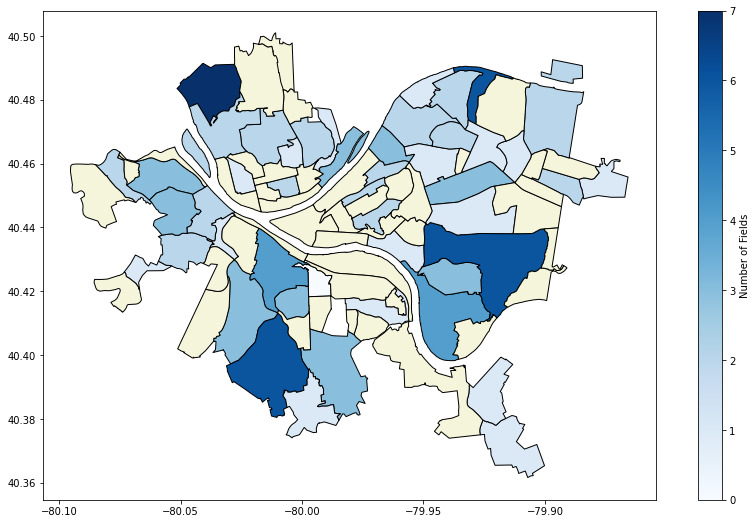

In [5]:
import pandas as pd
import geopandas
%matplotlib inline
fields = pd.read_csv("fields.csv")
num_fields = fields.groupby("Neighborhood").sum()['Back Stop']
num_fields.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
fields_map = neighborhoods.merge(num_fields, how='left', left_on='hood', right_on='Neighborhood')
fields_map[['hood','Back Stop','geometry']].head()
fields_map.plot(column='Back Stop',
               cmap='Blues',
               edgecolor="black",       
               legend=True,
               legend_kwds={'label': "Number of Fields"},
               figsize=(15, 9),       
               missing_kwds={"color": "beige"} 
               )